In [1]:
import pandas as pandas2

In [2]:
df1 = pandas2.read_excel("Aracaju.xlsx")
df2 = pandas2.read_excel("Fortaleza.xlsx")
df3 = pandas2.read_excel("Natal.xlsx")
df4 = pandas2.read_excel("Recife.xlsx")
df5 = pandas2.read_excel("Salvador.xlsx")

In [4]:
df = pandas2.concat([df1,df2,df3,df4,df5])

In [7]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
92,Fortaleza,2019-01-01,3.49,1005,4
14,Aracaju,2018-01-01,148.21,1521,3
230,Salvador,2019-01-03,184.69,1036,1
6,Salvador,2019-01-01,36.30,1034,2
84,Aracaju,2018-01-01,40.98,1520,5
14,Fortaleza,2019-01-12,132.68,1005,1
162,Natal,2019-01-02,23.08,1036,2
206,Natal,2019-01-02,151.45,1036,2
154,Salvador,2019-01-02,9.58,1037,1
56,Recife,2019-01-01,7.98,983,5


In [10]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [11]:
df["LojaID"] = df["LojaID"].astype("object")

In [12]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [13]:
df.isnull()

,Cidade,Data,Vendas,LojaID,Qtde
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
235,False,False,False,False,False
236,False,False,False,False,False
237,False,False,False,False,False
238,False,False,False,False,False


In [17]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [18]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [19]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [20]:
df["Receita"].max()

3544.0

In [21]:
df["Receita"].min()

3.34

In [23]:
df.nlargest(5, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0


In [24]:
df.nsmallest(5, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57
92,Salvador,2019-01-01,4.57,1035,1,4.57
95,Natal,2019-01-02,5.13,1035,1,5.13


In [25]:
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [26]:
# TRABALHANDO COM DATAS

In [31]:
df["Data"] = df["Data"].astype("int")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


In [32]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [36]:
df["Data"] = pandas2.to_datetime(df["Data"])

In [37]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [40]:
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [41]:
df.groupby(df["Data"].dt.month)["Receita"].sum()

Data
1     188456.50
2      37244.47
3      67794.01
4      13586.00
5       8965.00
6       7097.00
7       4462.00
8       1212.00
9       5984.00
10      9680.00
11      1126.00
12       816.00
Name: Receita, dtype: float64

In [42]:
df["Ano_Venda"] = df["Data"].dt.year 

In [43]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018


In [47]:
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [48]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3
239,Salvador,2019-01-03,161.41,1037,3,484.23,2019,1,3


In [50]:
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [51]:
df["Diferenca_Dias"] = df["Data"] - df["Data"].min()

In [52]:
df["Trimestre_Venda"] = df["Data"].dt.quarter

In [54]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3,367 days,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3,367 days,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3,367 days,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3,367 days,1
239,Salvador,2019-01-03,161.41,1037,3,484.23,2019,1,3,367 days,1


In [55]:
venda_marco_2019 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)] 

In [57]:
venda_marco_2019.tail(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
127,Salvador,2019-03-02,240.61,1035,3,721.83,2019,3,2,425 days,1
128,Salvador,2019-03-02,36.84,1034,1,36.84,2019,3,2,425 days,1
129,Salvador,2019-03-02,125.66,1037,1,125.66,2019,3,2,425 days,1
130,Salvador,2019-03-02,59.78,1036,1,59.78,2019,3,2,425 days,1
131,Salvador,2019-03-02,63.48,1037,3,190.44,2019,3,2,425 days,1
132,Salvador,2019-03-02,19.61,1036,2,39.22,2019,3,2,425 days,1
133,Salvador,2019-03-02,153.71,1035,1,153.71,2019,3,2,425 days,1
134,Salvador,2019-03-02,125.90,1036,1,125.90,2019,3,2,425 days,1
135,Salvador,2019-03-02,9.95,1037,3,29.85,2019,3,2,425 days,1
136,Salvador,2019-03-02,13.81,1036,1,13.81,2019,3,2,425 days,1


In [58]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

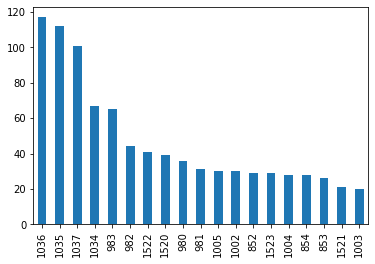

In [60]:
df["LojaID"].value_counts(ascending=False).plot.bar();

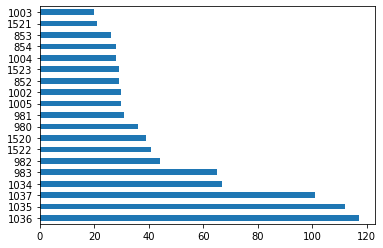

In [62]:
df["LojaID"].value_counts().plot.barh();

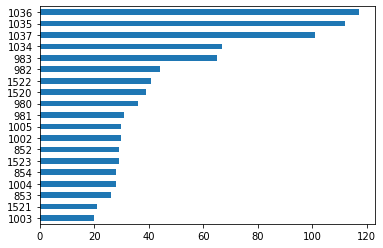

In [64]:
df["LojaID"].value_counts(ascending=True).plot.barh();

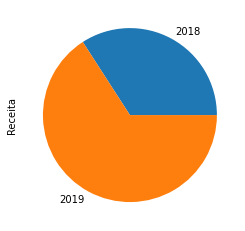

In [66]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [67]:
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

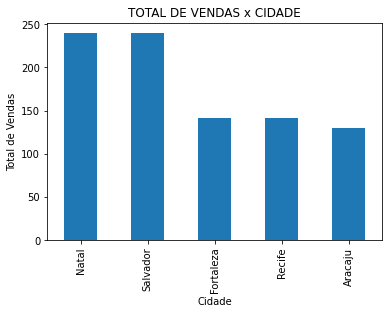

In [71]:
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="TOTAL DE VENDAS x CIDADE");
plt.xlabel("Cidade");
plt.ylabel("Total de Vendas");

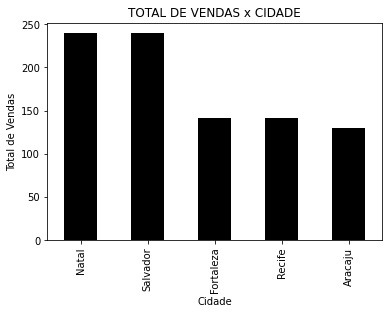

In [72]:
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="TOTAL DE VENDAS x CIDADE", color="black");
plt.xlabel("Cidade");
plt.ylabel("Total de Vendas");

In [73]:
plt.style.use("bmh")

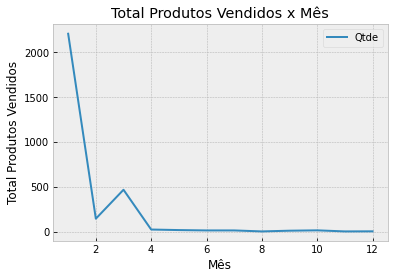

In [76]:
	df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title = "Total Produtos Vendidos x Mês")
	plt.xlabel("Mês")
	plt.ylabel("Total Produtos Vendidos");
	plt.legend();

In [85]:
df_2019 = df[df["Ano_Venda"] == 2019]

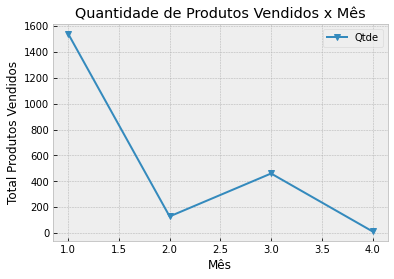

In [87]:
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de Produtos Vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("Gráfico QTDE x MES.png")